In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
default  = pd.read_csv('Default.csv')
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [6]:
default.shape

(10000, 5)

In [7]:
default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


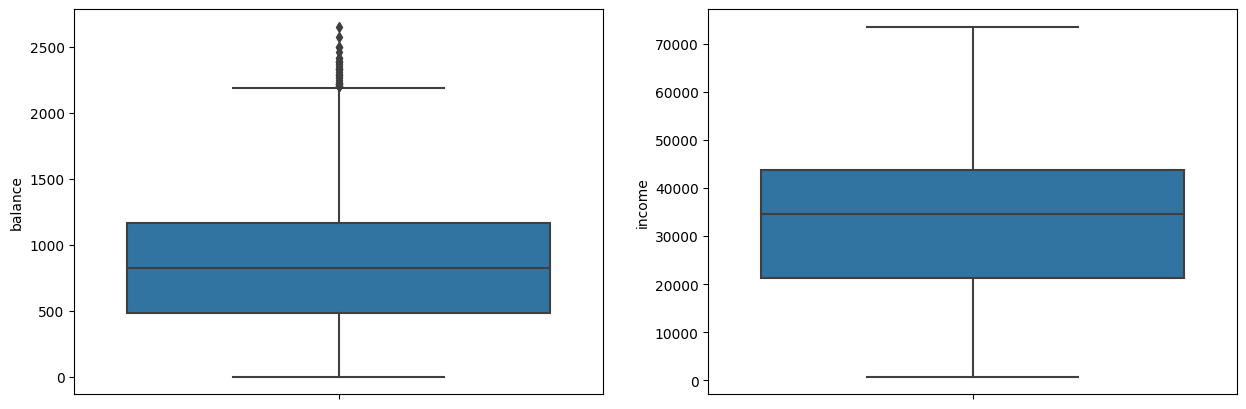

In [10]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y= default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y= default['income'])
plt.show()

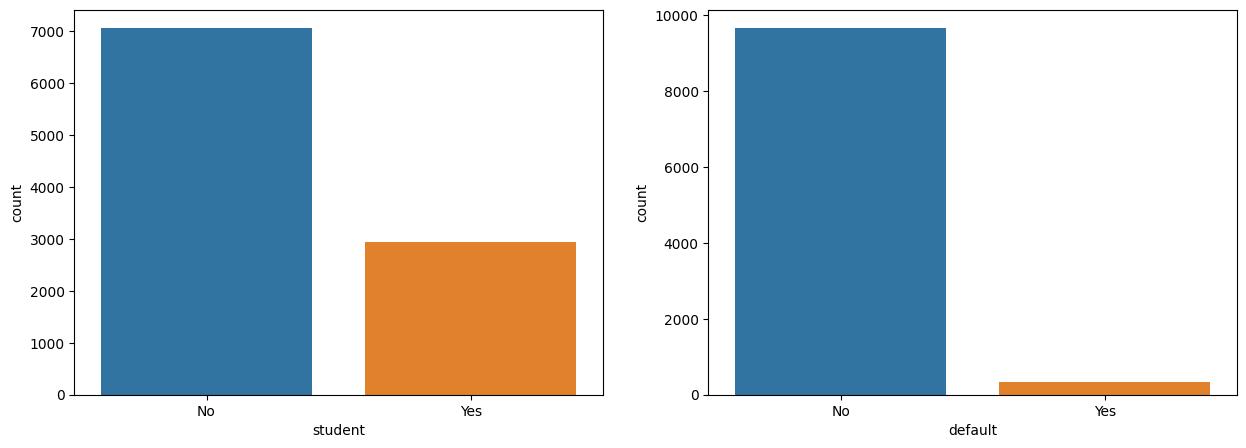

In [17]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x=default['student'])

plt.subplot(1,2,2)
sns.countplot(x=default['default'])
plt.show()

In [20]:
default['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [21]:
default['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [23]:
default['student'].value_counts(normalize=True)

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [24]:
default['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

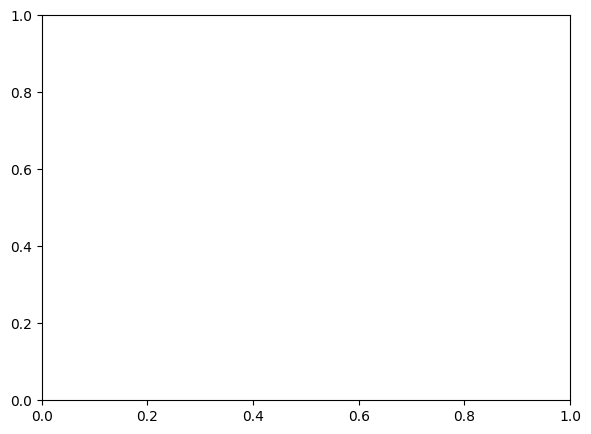

In [31]:

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(default['default'], default['balance'])

plt.subplot(1,2,2)
sns.boxplot(default['default'], default['income'])
plt.show()

In [32]:
pd.crosstab(default['student'], default['default'],normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


<Axes: >

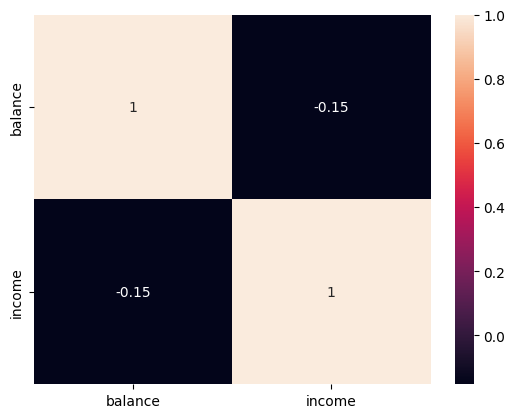

In [34]:
sns.heatmap(default[['balance','income']].corr(),annot = True)

In [35]:
default.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [36]:
Q1,Q3 = default['balance'].quantile([.25, .75])
IQR = Q3-Q1
LL = Q1-1.5*(IQR)
UL = Q3+1.5*(IQR)

In [37]:
UL

2193.1743086078154

In [39]:
df = default[default['balance'] > UL]

In [40]:
df

,Unnamed: 0,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492253
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519752
1359,1360,Yes,No,2220.966201,40725.096207
1502,1503,Yes,Yes,2332.878254,11770.234124
1609,1610,Yes,Yes,2269.946966,18021.105948
2096,2097,Yes,Yes,2261.848162,20030.165119
2140,2141,No,Yes,2308.893236,19110.266412
2929,2930,Yes,Yes,2387.314867,28296.914718
3162,3163,Yes,Yes,2415.316994,17429.503375


In [41]:
df['default'].count()

31

In [42]:
df['default'].value_counts(normalize=True)

default
Yes    0.83871
No     0.16129
Name: proportion, dtype: float64

In [43]:
df['default'].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [44]:
default['balance'] = np.where(default['balance'] > UL, UL, default['balance'])

<function matplotlib.pyplot.show(close=None, block=None)>

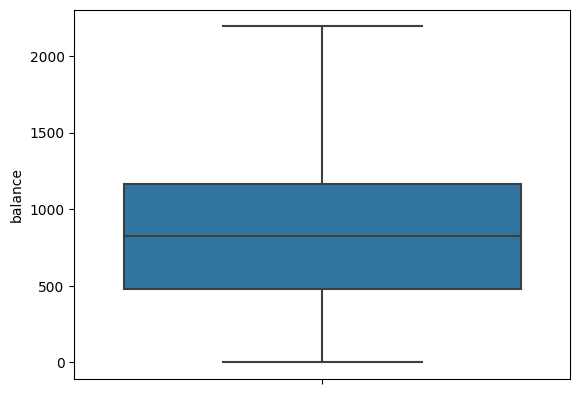

In [45]:
sns.boxplot(y = default['balance'])
plt.show

In [50]:
default = pd.get_dummies(default, drop_first = True)

In [51]:
default.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,False,False
1,2,817.180407,12106.134700,False,True
2,3,1073.549164,31767.138947,False,False
3,4,529.250605,35704.493935,False,False
4,5,785.655883,38463.495879,False,False


In [53]:
default.columns = ['serial', 'balance', 'income', 'default', 'student']

In [54]:
default.head()

,serial,balance,income,default,student
0,1,729.526495,44361.625074,False,False
1,2,817.180407,12106.134700,False,True
2,3,1073.549164,31767.138947,False,False
3,4,529.250605,35704.493935,False,False
4,5,785.655883,38463.495879,False,False


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x = default.drop('default', axis = 1)
y = default['default']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21, stratify = y)

In [69]:
print(x_train.shape)
print(x_test.shape)

(7000, 4)
(3000, 4)


In [70]:
print(y_train.value_counts(normalize= True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

default
False    0.97
True     0.03
Name: proportion, dtype: float64
 
default
False    0.97
True     0.03
Name: proportion, dtype: float64


In [74]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy=0.75)
x_res, y_res = sm.fit_sample(x_train, y_train)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression()

In [77]:
lr.fit(x_res, y_res)

NameError: name 'x_res' is not defined

In [78]:
y_pred = lr.pridict(x_test)

AttributeError: 'LogisticRegression' object has no attribute 'pridict'

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [83]:
(2589+75)/(2598+75+311+25)  #this is 88.5%

0.8853439680957128